In [1]:
import os 
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
sklearn.set_config(print_changed_only=True)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
with open('data/AmesHousing.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    data = list(reader)
    


In [3]:
# Data is now in a list of lists format
data[:2]

[['Order',
  'PID',
  'MS SubClass',
  'MS Zoning',
  'Lot Frontage',
  'Lot Area',
  'Street',
  'Alley',
  'Lot Shape',
  'Land Contour',
  'Utilities',
  'Lot Config',
  'Land Slope',
  'Neighborhood',
  'Condition 1',
  'Condition 2',
  'Bldg Type',
  'House Style',
  'Overall Qual',
  'Overall Cond',
  'Year Built',
  'Year Remod/Add',
  'Roof Style',
  'Roof Matl',
  'Exterior 1st',
  'Exterior 2nd',
  'Mas Vnr Type',
  'Mas Vnr Area',
  'Exter Qual',
  'Exter Cond',
  'Foundation',
  'Bsmt Qual',
  'Bsmt Cond',
  'Bsmt Exposure',
  'BsmtFin Type 1',
  'BsmtFin SF 1',
  'BsmtFin Type 2',
  'BsmtFin SF 2',
  'Bsmt Unf SF',
  'Total Bsmt SF',
  'Heating',
  'Heating QC',
  'Central Air',
  'Electrical',
  '1st Flr SF',
  '2nd Flr SF',
  'Low Qual Fin SF',
  'Gr Liv Area',
  'Bsmt Full Bath',
  'Bsmt Half Bath',
  'Full Bath',
  'Half Bath',
  'Bedroom AbvGr',
  'Kitchen AbvGr',
  'Kitchen Qual',
  'TotRms AbvGrd',
  'Functional',
  'Fireplaces',
  'Fireplace Qu',
  'Garage Type',
 

In [4]:
# Create headings list for DataFrame
headings = data[0]

In [5]:
# create a pandas dataframes for the ames data with the correct headings
df = pd.DataFrame.from_records(data[1:], columns=headings)

# replacing colums headers to remove spaces
# makes it easier to call the column name, but not necessary for code functionality 
df.columns = df.columns.str.replace(' ', '')
print(df.shape)
df.head()

(2930, 82)


,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0526301100,020,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,0526350040,020,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,0526351010,020,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,0526353030,020,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,0527105010,060,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [6]:
# Data is full of 'NA' or blank entries that need to be turned to proper NAN
df = df.replace(['NA', ''], np.NaN)


In [7]:
## all colums are objects, will need to convert them to the right data tpye. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order          2930 non-null   object
 1   PID            2930 non-null   object
 2   MSSubClass     2930 non-null   object
 3   MSZoning       2930 non-null   object
 4   LotFrontage    2440 non-null   object
 5   LotArea        2930 non-null   object
 6   Street         2930 non-null   object
 7   Alley          198 non-null    object
 8   LotShape       2930 non-null   object
 9   LandContour    2930 non-null   object
 10  Utilities      2930 non-null   object
 11  LotConfig      2930 non-null   object
 12  LandSlope      2930 non-null   object
 13  Neighborhood   2930 non-null   object
 14  Condition1     2930 non-null   object
 15  Condition2     2930 non-null   object
 16  BldgType       2930 non-null   object
 17  HouseStyle     2930 non-null   object
 18  OverallQual    2930 non-null

In [8]:
## list of numerica data columns
numeric_data_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
        'SalePrice']

## conver to float
df[numeric_data_columns] = df[numeric_data_columns].astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   object 
 1   PID            2930 non-null   object 
 2   MSSubClass     2930 non-null   float64
 3   MSZoning       2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   float64
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

In [10]:
df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Dealing with Missing values 
1) we have already replaced all the nans and blanks with np.nan  
2) drop variables with too many missing values.   
3) remove data we do not care about   
4) bin missing values into its own category for variables with too many missing values but still has data 

In [ ]:
## this is unique to each record and doesnt provide any additional value
df.drop(['Order'], axis=1, inplace=True)

In [11]:
# Dropping those variables with less than 300 non-null values
df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)
df.shape

(2930, 79)

In [13]:
# the goal is to predict house prices for residential homes, varaibles meanings in the description
# Delete all data with MSZoning = commercial, agriculture and industrial as these are not residential units
df.MSZoning.value_counts(dropna = False)

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MSZoning, dtype: int64

In [ ]:
df = df[(df.MSZoning != 'C (all)') & (df.MSZoning != 'I (all)') & (df.MSZoning != 'A (agr)')]

# TODO: Deal with missing  values in LOT frontage

In [14]:
# Notice a large number of null values in 'LotFrontage'. Examine the 'Lots' grouping.
df_lots = df[['LotFrontage', 'LotArea', 'LotConfig', 'LotShape']]
df_lots.groupby(['LotConfig']).count()

,LotFrontage,LotArea,LotShape
LotConfig,,,
Corner,407,511,511
CulDSac,92,180,180
FR2,65,85,85
FR3,10,14,14
Inside,1866,2140,2140


In [30]:
#df.to_csv('data/ames_housing.csv', index = False)

# Feature Engineering

## Age of house
## TODO: print correlations

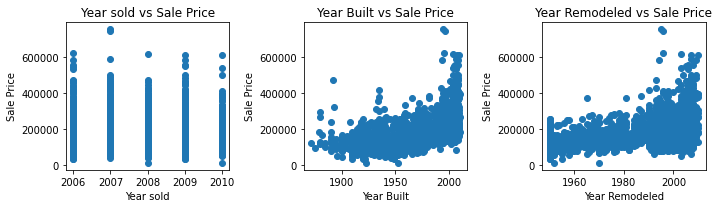

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,3))

## seems like both year year built and year remodelled are correlated to the sale price
## we might be able to combine the variables to make a more effective variable 

ax1.scatter(df.YrSold, df.SalePrice)
ax1.set_title('Year sold vs Sale Price')
ax1.set_xlabel('Year sold')
ax1.set_ylabel('Sale Price')

ax2.scatter(df.YearBuilt, df.SalePrice)
ax2.set_title('Year Built vs Sale Price')
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Sale Price')

ax3.scatter(df['YearRemod/Add'], df.SalePrice)
ax3.set_title('Year Remodeled vs Sale Price')
ax3.set_xlabel('Year Remodeled')
ax3.set_ylabel('Sale Price')

plt.tight_layout()
plt.savefig('images/EDA_sale_price_vs_age.png')
plt.show()

In [20]:
df['Age'] = df.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemod/Add']) 
                                                           else (x['YrSold']-x['YearRemod/Add']), axis=1)

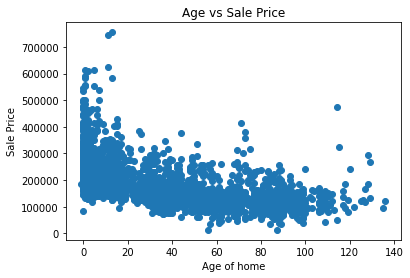

In [25]:
fig, ax1 = plt.subplots()
ax1.scatter(df.Age, df.SalePrice)
ax1.set_title('Age vs Sale Price')
ax1.set_xlabel('Age of home')
ax1.set_ylabel('Sale Price')
plt.show()

## Location, Location, Location!!!

We know that one key determinant of house prices is "location, location, location," which may involve difficult to measure attributes such as socio-economic status,local amenities, good schools and/or neighbourhood aesthetics etc. Every house buyer understands that the geographical location of a house is a highly important factor in its price. There are however 28 separate neighbourhoods listed under the 'Neighborhood' variable, and it is probably not advisable to have 28 dummy variables on top of other relevant factors in the regression. So it is best we reduce the number of neighbourhood dummies. 

The problems with having a dummy of each neighbourhood are:  
1) there are only a handful of observations for some neighbourhoods, with less than 30 for 8 neighbourhoods, and less than 100 for the majority of them  
2) there would be significant multicollinearity between certain neighbourhoods that share similar characteristics

It may be tempting to cluster the neighbourhoods by price, but that would be creating an explanatory variable that would be highly correlated to the target variable. A usual proxy would be to take average household income as a measure of a location/neighbourhood's desirability, but we do not have such data at hand. Instead, I looked at using some proxies from the available variables to construct the desirability of a neighbourhood, namely the variables on build quality and condition. The assumption behind this methodology is that the more "desirable" a neighbourhood, the better the quality of its housing structures and their condition. 

In [30]:
df.groupby('Neighborhood').count()['SalePrice'].sort_values()

Neighborhood
Landmrk      1
GrnHill      2
Greens       8
Blueste     10
NPkVill     23
Veenker     24
Blmngtn     28
BrDale      30
MeadowV     37
ClearCr     44
SWISU       48
StoneBr     51
NoRidge     71
Timber      72
IDOTRR      93
Crawfor    103
BrkSide    108
Mitchel    114
SawyerW    125
NWAmes     131
Sawyer     151
Gilbert    165
NridgHt    166
Somerst    182
Edwards    194
OldTown    239
CollgCr    267
NAmes      443
Name: SalePrice, dtype: int64

# TODO: Change to boxplot??

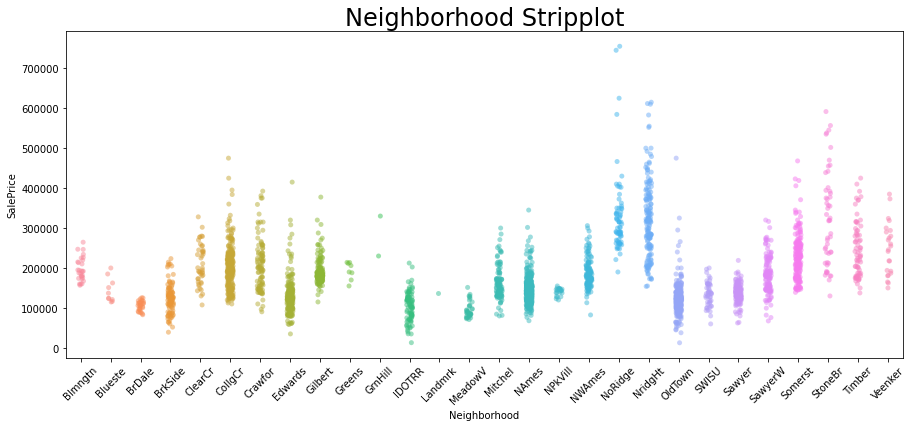

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,6))

sns.stripplot(x = df.Neighborhood, y = df.SalePrice, order = np.sort(df.Neighborhood.unique()),
              jitter=0.1, alpha=0.5, ax=ax)
plt.title('Neighborhood Stripplot', fontsize=24)
plt.xticks(rotation=45)
plt.show()

## Skew in Sale Price 

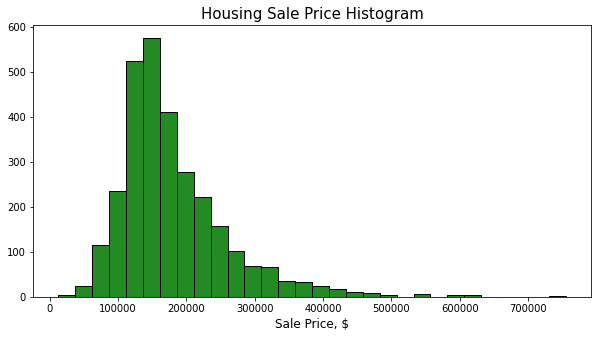

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

plt.hist(df.SalePrice, bins=30, color='forestgreen',edgecolor = 'black',)
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price, $', fontsize=12);

In [ ]:
References:

Andreas Muller Coms4993-s20 material
https://github.com/at-tan/Cracking_Ames_Housing_OLS

data_info: http://jse.amstat.org/v19n3/decock.pdf
